In [4]:
!source ./bin/activate
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

import seaborn as sns

ModuleNotFoundError: No module named 'pandas'

In [2]:
# in_df = pd.read_csv("https://raw.githubusercontent.com/redashu/Datasets/refs/heads/master/data_preprocess1.csv")
in_df = pd.read_csv('https://delvex-software-center.s3.ap-south-1.amazonaws.com/USGS/all_month.csv')
#in_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9593 entries, 0 to 9592
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             9593 non-null   object 
 1   latitude         9593 non-null   float64
 2   longitude        9593 non-null   float64
 3   depth            9593 non-null   float64
 4   mag              9592 non-null   float64
 5   magType          9592 non-null   object 
 6   nst              8018 non-null   float64
 7   gap              8018 non-null   float64
 8   dmin             8017 non-null   float64
 9   rms              9592 non-null   float64
 10  net              9593 non-null   object 
 11  id               9593 non-null   object 
 12  updated          9593 non-null   object 
 13  place            9593 non-null   object 
 14  type             9593 non-null   object 
 15  horizontalError  7317 non-null   float64
 16  depthError       9592 non-null   float64
 17  magError      

In [3]:
feats = ['latitude', 'longitude', 'depth', 'mag']
in_df.dropna(inplace=True, subset=feats)
#in_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9592 entries, 0 to 9592
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             9592 non-null   object 
 1   latitude         9592 non-null   float64
 2   longitude        9592 non-null   float64
 3   depth            9592 non-null   float64
 4   mag              9592 non-null   float64
 5   magType          9592 non-null   object 
 6   nst              8017 non-null   float64
 7   gap              8017 non-null   float64
 8   dmin             8016 non-null   float64
 9   rms              9591 non-null   float64
 10  net              9592 non-null   object 
 11  id               9592 non-null   object 
 12  updated          9592 non-null   object 
 13  place            9592 non-null   object 
 14  type             9592 non-null   object 
 15  horizontalError  7316 non-null   float64
 16  depthError       9591 non-null   float64
 17  magError         79

In [4]:
df_subset = in_df[['latitude', 'longitude', 'depth', 'mag']]

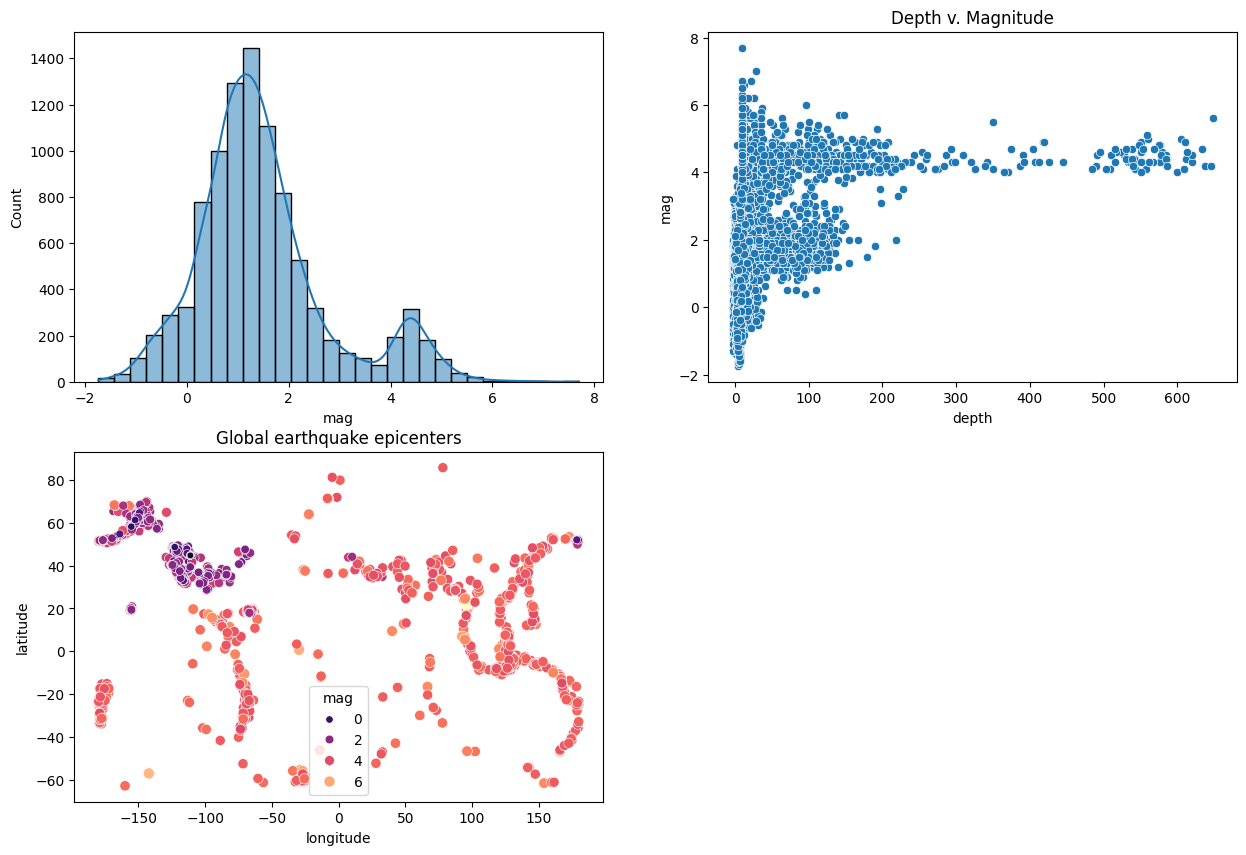

In [6]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.xlabel="Magnitude"
sns.histplot(df_subset['mag'], kde=True, bins=30)

plt.subplot(2,2,2)
plt.title("Depth v. Magnitude")
plt.xlabel="Depth in km"
sns.scatterplot(x='depth', y='mag', data=df_subset)

plt.subplot(2,2,3)
plt.title("Global earthquake epicenters")
plt.xlabel='Lon'
plt.ylabel='Lat'
sns.scatterplot(x='longitude', y='latitude', size='mag', hue='mag', palette='magma', data=df_subset)

plt.show()

In [9]:
input_features = df_subset[['latitude', 'longitude', 'depth']]
lat = df_subset['latitude'].values
lon = df_subset['longitude'].values
dep = df_subset['depth'].values
lbl = df_subset['mag'].values

In [8]:
print(input_features[:5])
print(lbl[:5])

    latitude   longitude  depth
0  38.840668 -122.834335   1.32
1  61.556800 -141.271600  13.40
2  61.789200 -149.608200  38.70
3  60.081400 -152.528700  97.80
4  35.639833 -117.548500   8.08
0    0.53
1    1.20
2    1.20
3    1.40
4    0.89
Name: mag, dtype: float64


In [45]:
ashu_impute = SimpleImputer(missing_values=np.nan, strategy='mean')

In [47]:
ashu_impute.fit(input_features)#[:,1:3]) # calculat+ing the missing values 
input_features = ashu_impute.transform(input_features)#[:,1:3]) # making changes

In [48]:
print(input_features[:5])

[[  38.84066772 -122.83433533    1.32000005]
 [  61.5568     -141.2716       13.4       ]
 [  61.7892     -149.6082       38.7       ]
 [  60.0814     -152.5287       97.8       ]
 [  35.6398333  -117.5485        8.08      ]]


In [15]:
le = LabelEncoder()
lbl = le.fit_transform(lbl)
print(lbl)

[0 1 0 0 1 1 0 1 0 1 1 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0 1 0 1 0]


In [16]:
ct = ColumnTransformer(transformers=[('encoder',
                                  OneHotEncoder(),
                                  [0]
                                 )], 
                    remainder='passthrough')

In [17]:
input_features = ct.fit_transform(input_features)

In [18]:
input_features

array([[1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 40.0, 66071.42857142857],
       [1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 0.0, 1.0, 39.0, 52000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0],
       [0.0, 1.0, 0.0, 28.0, 49000.0],
       [1.0, 0.0, 0.0, 42.0, 75000.0],
       [0.0, 0.0, 1.0, 33.0, 56000.0],
       [0.0, 1.0, 0.0, 45.0, 77000.0],
       [1.0, 0.0, 0.0, 29.0, 51000.0],
       [0.0, 0.0, 1.0, 51.0, 85000.0],
       [0.0, 1.0, 0.0, 36.0, 66071.42857142857],
       [1.0, 0.0, 0.0, 31.0, 55000.0],
       [0.0, 0.0, 1.0, 39.0, 63000.0],
       [0.0, 1.0, 0.0, 47.0, 80000.0],
       [1.0, 0.0, 0.0, 26.0, 47000.0],
       [0.0, 0.0, 1.0, 32.0, 53000.0],
       [0.0, 1.0, 0.0, 41.0, 71000.0],
       [1.0, 0.0, 0.0, 49.0, 82000.0],
       [0.0, 0.0, 1.0, 34.0, 57000.0],
     

In [11]:
train_ipt, test_ipt, train_lbl, test_lbl = train_test_split(input_features,
                                                            lbl,
                                                            test_size=0.2,
                                                            random_state=100)

In [12]:
from sklearn.ensemble import RandomForestRegressor

In [13]:
rfr = RandomForestRegressor()

In [15]:
trained_model = rfr.fit(train_ipt, train_lbl)

In [17]:
pred_mag = trained_model.predict(test_ipt)

In [19]:
from sklearn.metrics import mean_squared_error

In [20]:
mse = mean_squared_error(pred_mag, test_lbl)
print(mse)

0.23902145376082318


In [22]:
dc = DecisionTreeClassifier()

In [23]:
trained_model = dc.fit(train_ipt, train_lbl)

In [24]:
pred_vals = trained_model.predict(test_ipt)

In [25]:
pred_vals

array([0, 1, 0])

In [30]:
print(test_lbl)

[0 1 1]


In [31]:
accuracy_score(test_lbl, pred_vals)

0.6666666666666666

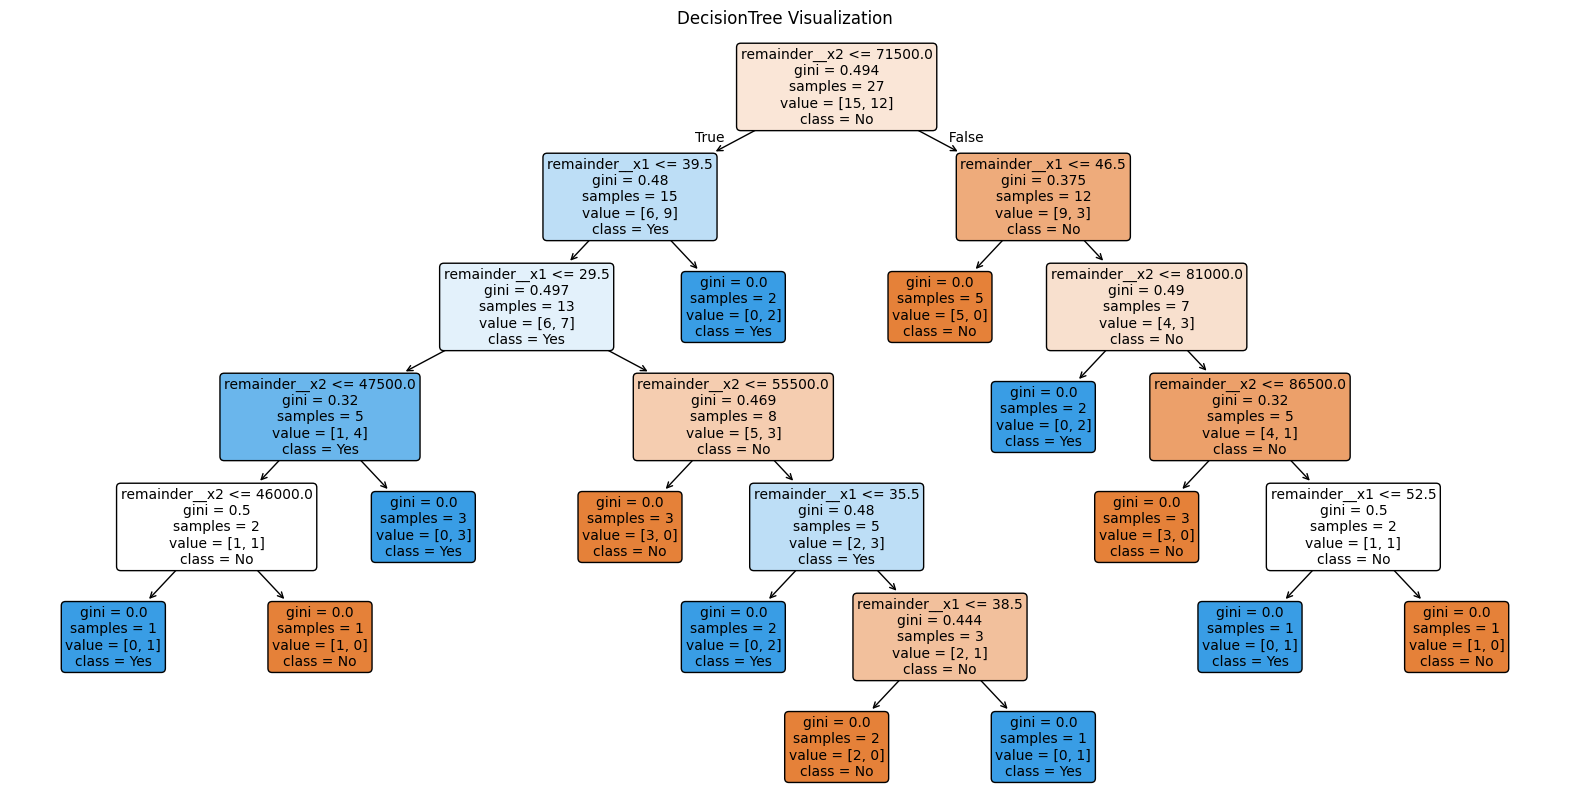

In [40]:
plt.figure(figsize=(20,10))
plot_tree(dc,
         feature_names=ct.get_feature_names_out(),
         class_names=le.classes_,
         filled=True,
         fontsize=10,
         rounded=True)
plt.title("DecisionTree Visualization")
plt.show()